In [777]:
#Load the dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.impute import KNNImputer
# this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window
%matplotlib inline
df= pd.read_csv('Luxury_Housing_Bangalore.csv')


In [778]:
# Make a copy of the original dataframe
df_copy=df.copy()

In [779]:
# Display the first few rows of the dataframe
df_copy.head()

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4bhk,12.750846039118798,Primary,NRI,2025-03-31,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3Bhk,16.292151871065954,Primary,Other,2024-06-30,4.839024,NaN,Under construction,NRI Desk,no,7.723898,106,NaN
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4bhk,10.517724412961911,Primary,HNI,2023-12-31,8.131315,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.
3,PROP000004,bellary road,Project_3,Embassy,6192.0,3BHK,9.396367494232896,Primary,HNI,2024-03-31,7.501657,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4Bhk,15.345392444511946,Secondary,HNI,2024-12-31,4.525216,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.


In [780]:
# Display the last few rows of the dataframe
df_copy.tail()

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
100995,PROP004730,BELLARY ROAD,Project_229,Embassy,8546.0,5Bhk+,11.33081004147843,Secondary,CXO,2024-12-31,8.552797,6.221131,Under construction,NRI Desk,no,7.511827,22,Will buy after possession.
100996,PROP059810,Bellary Road,Project_309,Brigade,3408.0,3bhk,10.829373158307602,Primary,CXO,2024-09-30,6.879269,9.783611,Ready to move,Direct,no,9.851849,26,Agent was not responsive.
100997,PROP065099,HENNUR ROAD,Project_98,RMZ,4691.0,4BHK,11.183303152058548,Primary,NRI,2023-12-31,6.753812,8.383013,Under construction,Broker,no,9.101604,44,Loved the amenities!
100998,PROP093022,rajajinagar,Project_21,Embassy,7435.0,3BHK,10.914156376035923,Secondary,Other,2024-06-30,4.437787,5.756247,Under construction,Broker,yes,8.588551,66,Excellent location!
100999,PROP023826,whitefield,Project_325,L&T Realty,3218.0,4bhk,₹13.27 Cr,Primary,Startup Founder,2023-12-31,7.760416,9.989290,Under construction,Direct,yes,9.917647,58,Loved the amenities!


In [781]:
# Display summary information about the dataframe
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Property_ID           101000 non-null  object 
 1   Micro_Market          101000 non-null  object 
 2   Project_Name          101000 non-null  object 
 3   Developer_Name        101000 non-null  object 
 4   Unit_Size_Sqft        90954 non-null   float64
 5   Configuration         101000 non-null  object 
 6   Ticket_Price_Cr       90981 non-null   object 
 7   Transaction_Type      101000 non-null  object 
 8   Buyer_Type            101000 non-null  object 
 9   Purchase_Quarter      101000 non-null  object 
 10  Connectivity_Score    101000 non-null  float64
 11  Amenity_Score         90910 non-null   float64
 12  Possession_Status     101000 non-null  object 
 13  Sales_Channel         101000 non-null  object 
 14  NRI_Buyer             101000 non-null  object 
 15  

# Data has missing values across the Column's (Amenity_Score,Buyer_Comments,Unit_Size_Sqft,Ticket_Price_Cr) -Needed the take fill, remove the data accodingly 
#

In [782]:
#Summary Statistics
df_copy.describe()

,Unit_Size_Sqft,Connectivity_Score,Amenity_Score,Locality_Infra_Score,Avg_Traffic_Time_Min
count,90954.000000,101000.000000,90910.000000,101000.000000,101000.000000
mean,5972.274765,6.992619,7.503663,7.498426,67.182921
std,1783.397836,1.731757,1.440758,1.443128,30.271611
min,-1.000000,4.000031,5.000224,5.000013,15.000000
25%,4477.250000,5.494526,6.260329,6.247954,41.000000
50%,5990.000000,6.985805,7.499123,7.495614,67.000000
75%,7497.000000,8.490000,8.752207,8.749824,93.000000
max,8999.000000,9.999970,9.999865,9.999956,119.000000


In [783]:
# Check for unique column names
df_copy.columns.unique()

Index(['Property_ID', 'Micro_Market', 'Project_Name', 'Developer_Name',
       'Unit_Size_Sqft', 'Configuration', 'Ticket_Price_Cr',
       'Transaction_Type', 'Buyer_Type', 'Purchase_Quarter',
       'Connectivity_Score', 'Amenity_Score', 'Possession_Status',
       'Sales_Channel', 'NRI_Buyer', 'Locality_Infra_Score',
       'Avg_Traffic_Time_Min', 'Buyer_Comments'],
      dtype='object')

In [784]:
df_copy['Property_ID'].unique()

array(['PROP000001', 'PROP000002', 'PROP000003', ..., 'PROP099998',
       'PROP099999', 'PROP100000'], shape=(100000,), dtype=object)

In [785]:
df_copy['Micro_Market'].unique()

array(['Sarjapur Road', 'Indiranagar', 'Bannerghatta Road',
       'bellary road', 'Koramangala', 'YELAHANKA', 'whitefield',
       'sarjapur road', 'JP NAGAR', 'Rajajinagar', 'koramangala',
       'WHITEFIELD', 'indiranagar', 'jayanagar', 'Whitefield', 'DOMLUR',
       'yelahanka', 'Mg Road', 'HENNUR ROAD', 'Jayanagar', 'Domlur',
       'Electronic City', 'Hebbal', 'mg road', 'jp nagar',
       'BANNERGHATTA ROAD', 'MG ROAD', 'KANAKAPURA ROAD', 'HEBBAL',
       'BELLARY ROAD', 'electronic city', 'ELECTRONIC CITY',
       'Bellary Road', 'Hennur Road', 'rajajinagar', 'Kanakapura Road',
       'INDIRANAGAR', 'hennur road', 'kanakapura road', 'domlur',
       'bannerghatta road', 'RAJAJINAGAR', 'hebbal', 'Yelahanka',
       'SARJAPUR ROAD', 'KORAMANGALA', 'Jp Nagar', 'JAYANAGAR'],
      dtype=object)

In [786]:
map = {
    'BANNERGHATTA ROAD': 'Bannerghatta Road',
    'bannerghatta road': 'Bannerghatta Road',
    
    'BELLARY ROAD': 'Bellary Road',
    'bellary road': 'Bellary Road',
    
    'DOMLUR': 'Domlur',
    'domlur': 'Domlur',
    
    'ELECTRONIC CITY': 'Electronic City',
    'electronic city': 'Electronic City',
    
    'HEBBAL': 'Hebbal',
    'hebbal': 'Hebbal',
    
    'HENNUR ROAD': 'Hennur Road',
    'hennur road': 'Hennur Road',
    
    'INDIRA NAGAR': 'IndiraNagar',
    'indira nagar': 'IndiraNagar',
    'indiranagar': 'IndiraNagar',
    'Indiranagar': 'IndiraNagar',
    'INDIRANAGAR': 'IndiraNagar',
    
    'J.P. NAGAR': 'JpNagar',
    'j.p. nagar': 'JpNagar',
    'JP NAGAR': 'JpNagar',
    'jp nagar': 'JpNagar',
    'Jp Nagar': 'JpNagar',
    
    'JAYANAGAR': 'Jayanagar',
    'jayanagar': 'Jayanagar',
    'Jaya Nagar': 'Jayanagar',
    'JayaNagar': 'Jayanagar',
    'JayaNagar': 'Jayanagar',
    
    'KANAKAPURA ROAD': 'Kanakapura Road',
    'kanakapura road': 'Kanakapura Road',
    
    'KORAMANGALA': 'Koramangala',
    'koramangala': 'Koramangala',
    
    'MG ROAD': 'MG Road',
    'mg road': 'MG Road',
    'Mg Road': 'MG Road',
    
    'RAJAJINAGAR': 'RajajiNagar',
    'rajajinagar': 'RajajiNagar',
    'Rajajinagar': 'RajajiNagar',
    'Rajaji Nagar': 'RajajiNagar',
    
    'SARJAPUR ROAD': 'Sarjapur Road',
    'sarjapur road': 'Sarjapur Road',
    
    'WHITEFIELD': 'Whitefield',
    'whitefield': 'Whitefield',
    
    'YELAHANKA': 'Yelahanka',
    'yelahanka': 'Yelahanka'
}
df_copy['Micro_Market'] = df_copy['Micro_Market'].replace(map)

In [787]:
# mapped values for the column 'Micro_Market'
df_copy['Micro_Market'].unique()

array(['Sarjapur Road', 'IndiraNagar', 'Bannerghatta Road',
       'Bellary Road', 'Koramangala', 'Yelahanka', 'Whitefield',
       'JpNagar', 'RajajiNagar', 'Jayanagar', 'Domlur', 'MG Road',
       'Hennur Road', 'Electronic City', 'Hebbal', 'Kanakapura Road'],
      dtype=object)

In [788]:
df_copy['Project_Name'].unique().sum()

'Project_0Project_1Project_2Project_3Project_4Project_5Project_6Project_7Project_8Project_9Project_10Project_11Project_12Project_13Project_14Project_15Project_16Project_17Project_18Project_19Project_20Project_21Project_22Project_23Project_24Project_25Project_26Project_27Project_28Project_29Project_30Project_31Project_32Project_33Project_34Project_35Project_36Project_37Project_38Project_39Project_40Project_41Project_42Project_43Project_44Project_45Project_46Project_47Project_48Project_49Project_50Project_51Project_52Project_53Project_54Project_55Project_56Project_57Project_58Project_59Project_60Project_61Project_62Project_63Project_64Project_65Project_66Project_67Project_68Project_69Project_70Project_71Project_72Project_73Project_74Project_75Project_76Project_77Project_78Project_79Project_80Project_81Project_82Project_83Project_84Project_85Project_86Project_87Project_88Project_89Project_90Project_91Project_92Project_93Project_94Project_95Project_96Project_97Project_98Project_99Project_1

In [789]:
df_copy['Developer_Name'].unique()

array(['RMZ', 'Puravankara', 'Tata Housing', 'Embassy', 'SNN Raj',
       'Brigade', 'Prestige', 'Total Environment', 'Godrej', 'L&T Realty',
       'Sobha'], dtype=object)

In [790]:
df_copy['Unit_Size_Sqft'].unique()

array([4025., 5760., 7707., ..., 3000., 3238., 5432.], shape=(6002,))

In [791]:
df_copy['Unit_Size_Sqft'].isnull().sum()

np.int64(10046)

<Axes: xlabel='Unit_Size_Sqft', ylabel='Count'>

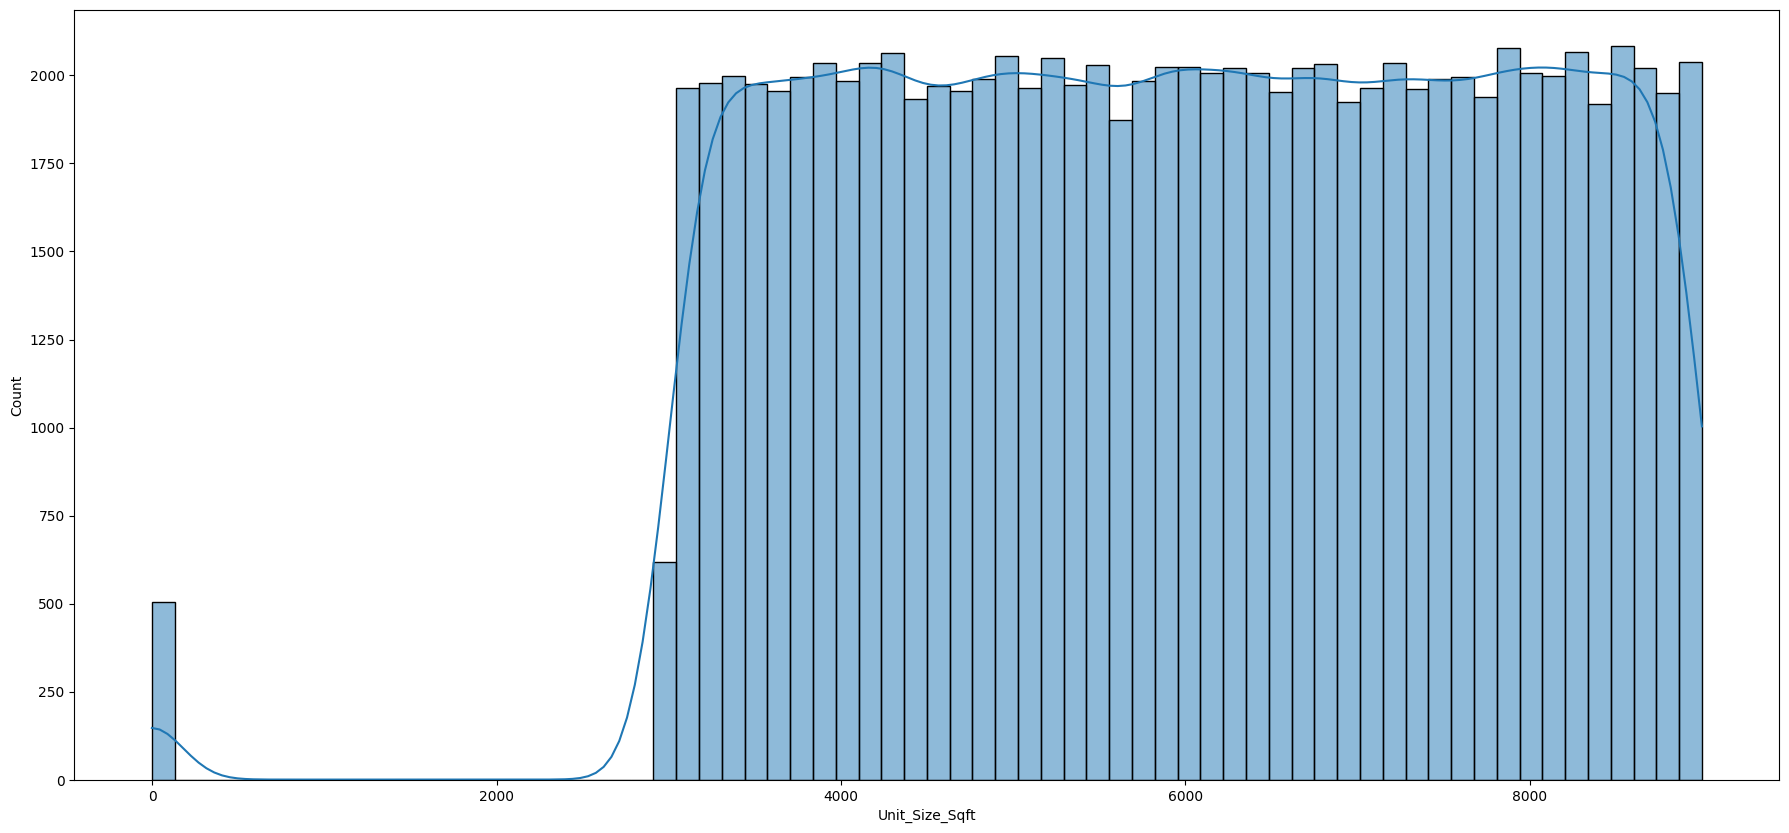

In [792]:
plt.figure(figsize=(22, 10))
sns.histplot(df_copy['Unit_Size_Sqft'], kde=True)

<Axes: ylabel='Unit_Size_Sqft'>

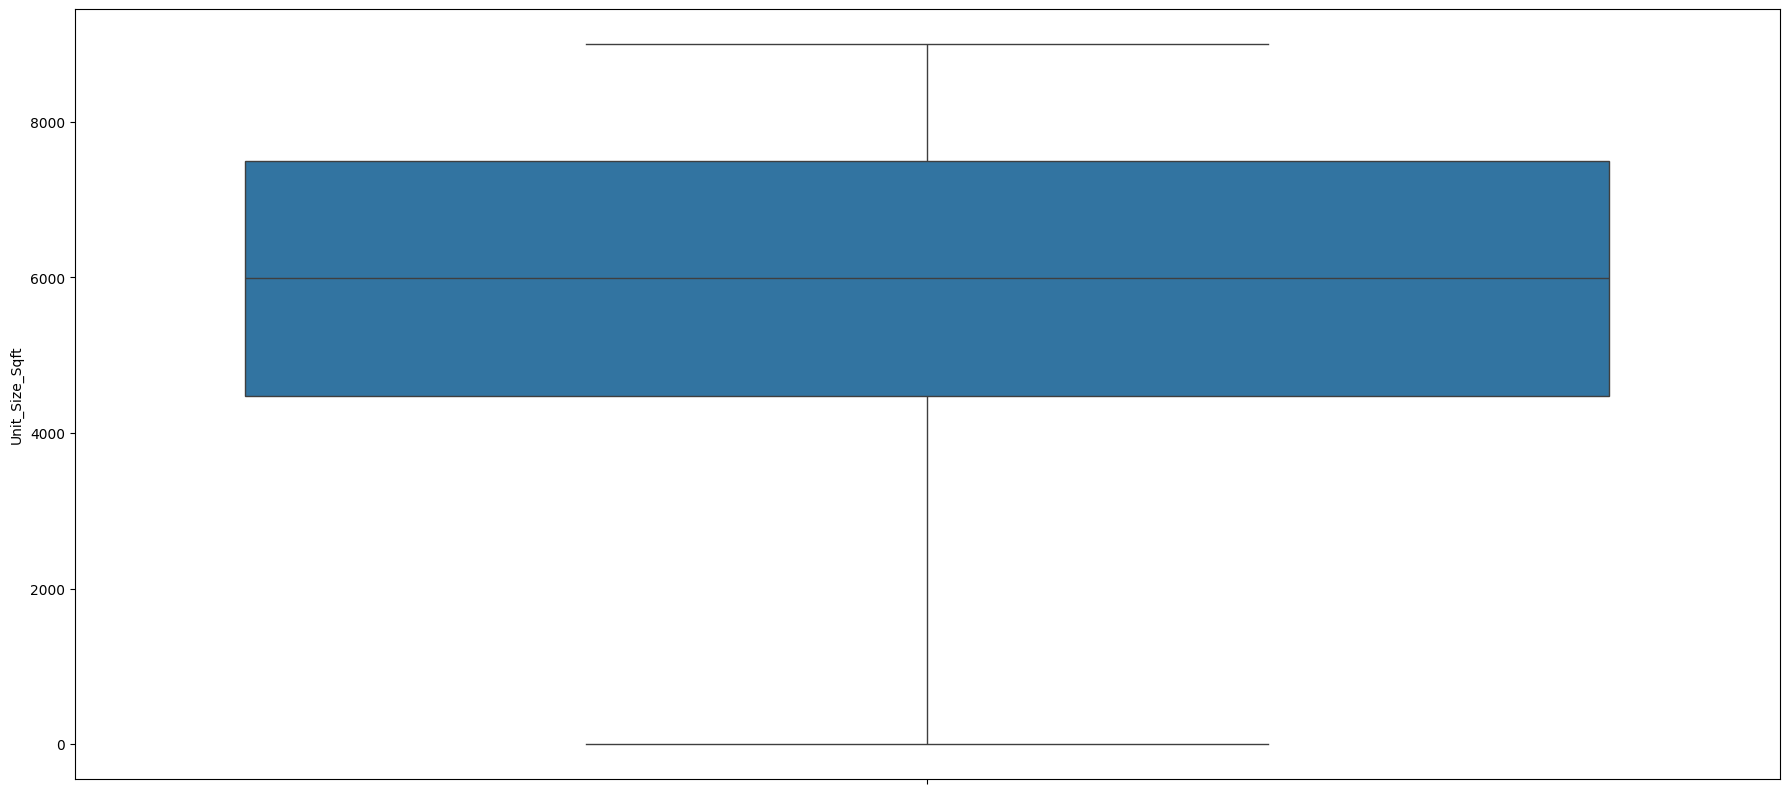

In [793]:
plt.figure(figsize=(22, 10))
sns.boxplot(y=df_copy['Unit_Size_Sqft'])

In [794]:
df_copy[df['Unit_Size_Sqft'] < 2000]

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
145,PROP000146,Bellary Road,Project_145,Puravankara,-1.0,3Bhk,9.094891145564691,Secondary,Startup Founder,2024-03-31,9.952351,7.824742,Ready to move,Direct,yes,6.690428,78,Loved the amenities!
238,PROP000239,Koramangala,Project_238,Sobha,-1.0,5Bhk+,11.065757877782282,Secondary,Other,2024-06-30,8.900902,NaN,Ready to move,Broker,yes,5.698885,43,Too far from my office.
244,PROP000245,Sarjapur Road,Project_244,L&T Realty,-1.0,5BHK+,18.42659417975841,Secondary,Startup Founder,2023-09-30,5.045976,7.885277,Under construction,Online,yes,5.766082,102,Connectivity is poor.
289,PROP000290,Yelahanka,Project_289,Sobha,-1.0,4BHK,12.199936011524152,Secondary,CXO,2024-06-30,7.194905,6.825103,Ready to move,NRI Desk,no,9.728299,21,Loved the amenities!
747,PROP000748,Sarjapur Road,Project_247,Embassy,-1.0,3Bhk,9.448331344653205,Primary,Other,2023-12-31,8.701167,5.982552,Ready to move,Online,yes,8.384907,57,Loved the amenities!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100069,PROP089998,Domlur,Project_497,Godrej,-1.0,5BHK+,5.947726506609008,Secondary,HNI,2024-12-31,5.149795,8.012676,Under construction,Broker,yes,9.011854,39,Great value for money.
100087,PROP019615,JpNagar,Project_114,L&T Realty,-1.0,5BHK+,11.398934559342257,Secondary,Other,2025-03-31,7.907058,9.525587,Launch,NRI Desk,no,6.438825,64,Underpriced for location.
100553,PROP023080,Sarjapur Road,Project_79,Tata Housing,-1.0,4Bhk,11.225770440381915,Secondary,HNI,2023-09-30,7.973186,5.215596,Launch,Broker,yes,6.168787,46,Will buy after possession.
100714,PROP078559,Domlur,Project_58,Brigade,-1.0,3Bhk,14.438398287100107,Primary,Startup Founder,2025-03-31,9.061157,9.848616,Under construction,NRI Desk,no,8.069680,68,Great view from 15th floor.


In [795]:
df_copy['Unit_Size_Sqft']=df_copy['Unit_Size_Sqft'].replace(-1.0,np.nan)

<Axes: ylabel='Unit_Size_Sqft'>

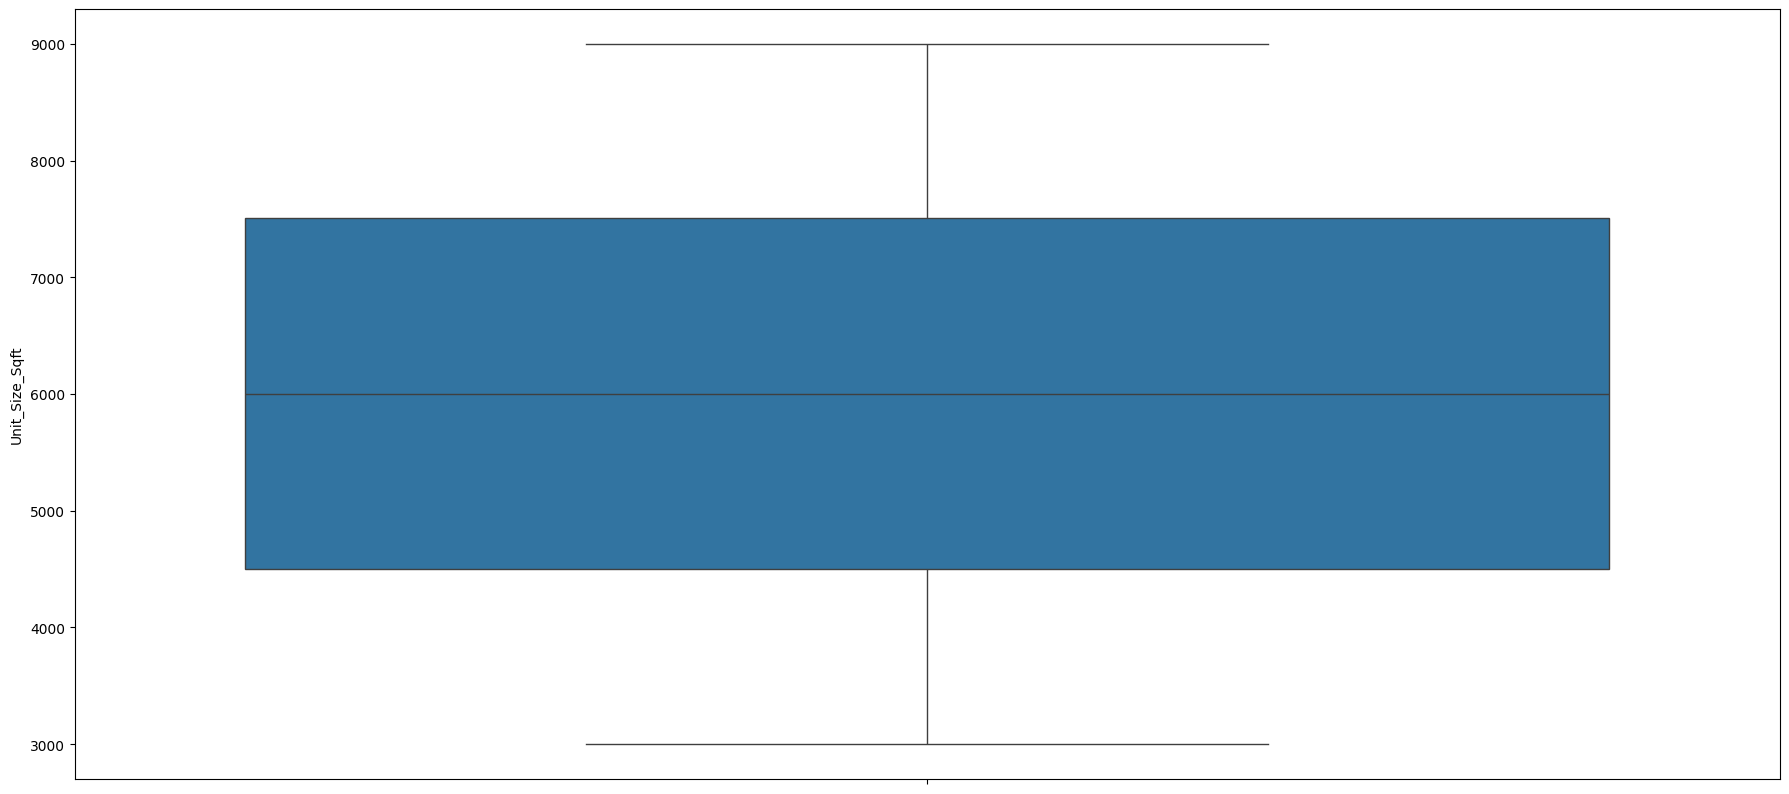

In [796]:
plt.figure(figsize=(22, 10))
sns.boxplot(y=df_copy['Unit_Size_Sqft'])

In [797]:
(df_copy['Unit_Size_Sqft'].isnull().sum() / len(df)) * 100

np.float64(10.446534653465346)

In [798]:
df_copy['Unit_Size_Sqft']=df_copy['Unit_Size_Sqft'].replace('',np.nan)

In [799]:
df_copy['Unit_Size_Sqft'].isnull().sum()

np.int64(10551)

In [800]:
# spike in the orginal data for the 'Unit_Size_Sqft' column
# around 6000 sqft which won't yeild accurate results if we use median imputation

# Hence have decided to use KNN imputation for handling missing values in the 'Unit_Size_Sqft' column

In [801]:
df_copy['Unit_Size_Sqft']=df_copy['Unit_Size_Sqft'].replace('',np.nan)
df_copy['Unit_Size_Sqft']=df_copy['Unit_Size_Sqft'].replace(-1.0,np.nan)

In [802]:
# Apply KNN imputation
imputer = KNNImputer(n_neighbors=10)
df_copy['Unit_Size_Sqft'] = imputer.fit_transform(df_copy[['Unit_Size_Sqft']])

In [803]:
df_copy['Unit_Size_Sqft'].isnull().sum()

np.int64(0)

<Axes: xlabel='Unit_Size_Sqft', ylabel='Count'>

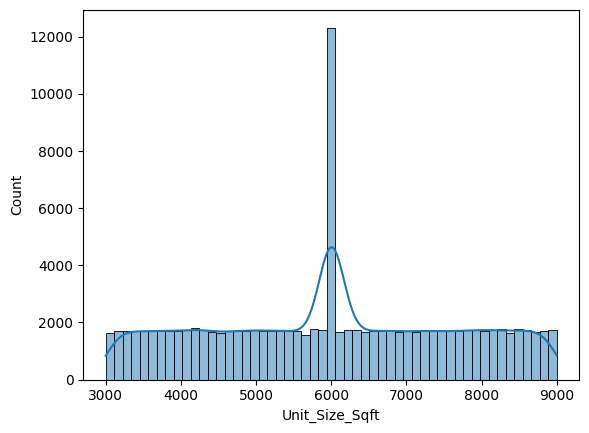

In [804]:
sns.histplot(df_copy['Unit_Size_Sqft'], kde=True)

In [805]:
# Step 1: Convert to string
import numpy as np

df_copy['Ticket_Price_Cr'] = (
    df_copy['Ticket_Price_Cr']
    .astype(str)
    .str.replace(r'[^0-9.]', '', regex=True)  # removes ₹, Cr, commas, etc.
    .str.strip()
    .replace('', np.nan)
    .astype(float)
)



In [806]:
df['Ticket_Price_Cr'] = df['Ticket_Price_Cr'].astype(str).str.extract(r'(\d+\.\d+)').astype(float)

In [807]:
df['Ticket_Price_Cr'].head(10).tolist()

[12.750846039118798,
 16.292151871065954,
 10.517724412961911,
 9.396367494232896,
 15.345392444511946,
 9.82,
 10.896752354445224,
 9.357538943683888,
 12.299449409872416,
 9.193310278863123]

In [808]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Property_ID           101000 non-null  object 
 1   Micro_Market          101000 non-null  object 
 2   Project_Name          101000 non-null  object 
 3   Developer_Name        101000 non-null  object 
 4   Unit_Size_Sqft        101000 non-null  float64
 5   Configuration         101000 non-null  object 
 6   Ticket_Price_Cr       90981 non-null   float64
 7   Transaction_Type      101000 non-null  object 
 8   Buyer_Type            101000 non-null  object 
 9   Purchase_Quarter      101000 non-null  object 
 10  Connectivity_Score    101000 non-null  float64
 11  Amenity_Score         90910 non-null   float64
 12  Possession_Status     101000 non-null  object 
 13  Sales_Channel         101000 non-null  object 
 14  NRI_Buyer             101000 non-null  object 
 15  

In [809]:
df_copy['Ticket_Price_Cr'].value_counts(dropna=False)

Ticket_Price_Cr
NaN           10019
100.000000      351
70.000000       335
60.000000       324
11.710000        41
              ...  
14.649172         1
10.458397         1
9.011187          1
8.069051          1
18.440417         1
Name: count, Length: 72852, dtype: int64

In [810]:
df_copy['Ticket_Price_Cr'].isnull().sum()

np.int64(10019)

In [811]:
#KNNImputer for 'Ticket_Price_Cr' for missing values
imputer = KNNImputer(n_neighbors=5)
df_copy['Ticket_Price_Cr'] = imputer.fit_transform(df_copy[['Ticket_Price_Cr']])

<Figure size 500x1500 with 0 Axes>

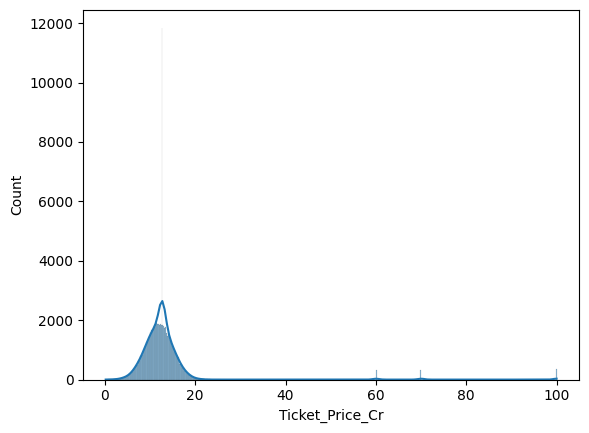

<Figure size 500x1500 with 0 Axes>

In [812]:
sns.histplot(df_copy['Ticket_Price_Cr'], kde=True)
plt.figure(figsize=(5, 15))

<Axes: ylabel='Ticket_Price_Cr'>

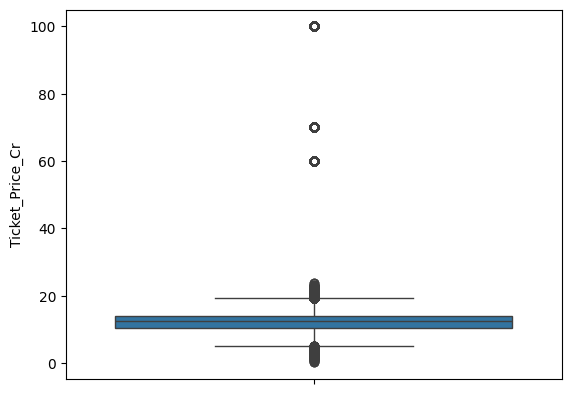

In [813]:
sns.boxplot(y=df_copy['Ticket_Price_Cr'])

In [814]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Property_ID           101000 non-null  object 
 1   Micro_Market          101000 non-null  object 
 2   Project_Name          101000 non-null  object 
 3   Developer_Name        101000 non-null  object 
 4   Unit_Size_Sqft        101000 non-null  float64
 5   Configuration         101000 non-null  object 
 6   Ticket_Price_Cr       101000 non-null  float64
 7   Transaction_Type      101000 non-null  object 
 8   Buyer_Type            101000 non-null  object 
 9   Purchase_Quarter      101000 non-null  object 
 10  Connectivity_Score    101000 non-null  float64
 11  Amenity_Score         90910 non-null   float64
 12  Possession_Status     101000 non-null  object 
 13  Sales_Channel         101000 non-null  object 
 14  NRI_Buyer             101000 non-null  object 
 15  

In [815]:
# Handling outliers in 'Ticket_Price_Cr' using IQR method
#User Where function to retain the original dataframe size

Q1=df_copy['Ticket_Price_Cr'].quantile(0.25)
Q3=df_copy['Ticket_Price_Cr'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df_copy['Ticket_Price_Cr'] = df_copy['Ticket_Price_Cr'].where(
    (df_copy['Ticket_Price_Cr'] >= lower_bound) &
    (df_copy['Ticket_Price_Cr'] <= upper_bound),
    np.nan)

In [816]:
df_copy['Ticket_Price_Cr'].isnull().sum()   

np.int64(2533)

In [817]:
#KNNImputer for 'Ticket_Price_Cr' for missing values
imputer = KNNImputer(n_neighbors=5)
df_copy['Ticket_Price_Cr'] = imputer.fit_transform(df_copy[['Ticket_Price_Cr']])

In [818]:
df_copy['Ticket_Price_Cr'].isnull().sum()   

np.int64(0)

<Axes: ylabel='Ticket_Price_Cr'>

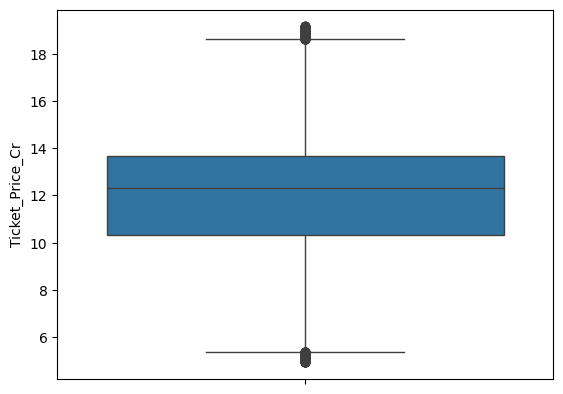

In [819]:
sns.boxplot(y=df_copy['Ticket_Price_Cr'])

In [820]:
df_copy['Configuration'].unique()

array(['4bhk', '3Bhk', '3BHK', '4Bhk', '5BHK+', '4BHK', '5bhk+', '5Bhk+',
       '3bhk'], dtype=object)

In [866]:
Replace_map = {'3Bhk': '3BHK','3bhk': '3BHK',
               '4bhk': '4BHK','4Bhk': '4BHK',
               '5bhk+': '5BHK+','5Bhk+': '5BHK+',
               
               
               }
df_copy['Configuration'] = df_copy['Configuration'].replace(Replace_map)
df_copy['Configuration'].unique()

array(['4BHK', '3BHK', '5BHK+'], dtype=object)

In [867]:
df_copy['Configuration'].unique()

array(['4BHK', '3BHK', '5BHK+'], dtype=object)

In [821]:
df_copy['Buyer_Type'].unique()

array(['NRI', 'Other', 'HNI', 'CXO', 'Startup Founder'], dtype=object)

In [822]:
df_copy['Buyer_Type'].isnull().sum()

np.int64(0)

In [823]:
df_copy['Purchase_Quarter'].unique()

array(['2025-03-31', '2024-06-30', '2023-12-31', '2024-03-31',
       '2024-12-31', '2023-09-30', '2024-09-30', '2023-06-30'],
      dtype=object)

In [824]:
df_copy['Purchase_Quarter'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 101000 entries, 0 to 100999
Series name: Purchase_Quarter
Non-Null Count   Dtype 
--------------   ----- 
101000 non-null  object
dtypes: object(1)
memory usage: 789.2+ KB


In [825]:
df1=df_copy.copy()

In [826]:
df_copy['Purchase_Quarter'] = pd.to_datetime(df_copy['Purchase_Quarter'])
df_copy['Purchase_Quarter'].unique()

<DatetimeArray>
['2025-03-31 00:00:00', '2024-06-30 00:00:00', '2023-12-31 00:00:00',
 '2024-03-31 00:00:00', '2024-12-31 00:00:00', '2023-09-30 00:00:00',
 '2024-09-30 00:00:00', '2023-06-30 00:00:00']
Length: 8, dtype: datetime64[ns]

In [827]:
df_copy['Purchase_Quarter'].astype('datetime64[ns]')

0        2025-03-31
1        2024-06-30
2        2023-12-31
3        2024-03-31
4        2024-12-31
            ...    
100995   2024-12-31
100996   2024-09-30
100997   2023-12-31
100998   2024-06-30
100999   2023-12-31
Name: Purchase_Quarter, Length: 101000, dtype: datetime64[ns]

In [828]:
df_copy['Year'] = df_copy['Purchase_Quarter'].dt.year
df_copy['Month'] = df_copy['Purchase_Quarter'].dt.month
df_copy['Day'] = df_copy['Purchase_Quarter'].dt.day

In [829]:
df_copy

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,...,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments,Year,Month,Day
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4bhk,12.750846,Primary,NRI,2025-03-31,...,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!,2025,3,31
1,PROP000002,IndiraNagar,Project_1,Puravankara,5760.0,3Bhk,16.292152,Primary,Other,2024-06-30,...,NaN,Under construction,NRI Desk,no,7.723898,106,NaN,2024,6,30
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4bhk,10.517724,Primary,HNI,2023-12-31,...,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.,2023,12,31
3,PROP000004,Bellary Road,Project_3,Embassy,6192.0,3BHK,9.396367,Primary,HNI,2024-03-31,...,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!,2024,3,31
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4Bhk,15.345392,Secondary,HNI,2024-12-31,...,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.,2024,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100995,PROP004730,Bellary Road,Project_229,Embassy,8546.0,5Bhk+,11.330810,Secondary,CXO,2024-12-31,...,6.221131,Under construction,NRI Desk,no,7.511827,22,Will buy after possession.,2024,12,31
100996,PROP059810,Bellary Road,Project_309,Brigade,3408.0,3bhk,10.829373,Primary,CXO,2024-09-30,...,9.783611,Ready to move,Direct,no,9.851849,26,Agent was not responsive.,2024,9,30
100997,PROP065099,Hennur Road,Project_98,RMZ,4691.0,4BHK,11.183303,Primary,NRI,2023-12-31,...,8.383013,Under construction,Broker,no,9.101604,44,Loved the amenities!,2023,12,31
100998,PROP093022,RajajiNagar,Project_21,Embassy,7435.0,3BHK,10.914156,Secondary,Other,2024-06-30,...,5.756247,Under construction,Broker,yes,8.588551,66,Excellent location!,2024,6,30


In [830]:
df_copy['Connectivity_Score'].unique()

array([7.99009059, 4.83902377, 8.13131488, ..., 6.19334714, 9.43564628,
       5.78629175], shape=(100000,))

In [831]:
df_copy['Amenity_Score'].unique()

array([5.46286299,        nan, 8.66922724, ..., 7.48247301, 6.36927632,
       5.28402643], shape=(90001,))

In [832]:
df_copy['Amenity_Score'].isnull().sum()

np.int64(10090)

In [833]:
imputer = KNNImputer(n_neighbors=5)
df_copy['Amenity_Score'] = imputer.fit_transform(df_copy[['Amenity_Score']])

In [834]:
df_copy['Amenity_Score'].isnull().sum()

np.int64(0)

<Axes: ylabel='Amenity_Score'>

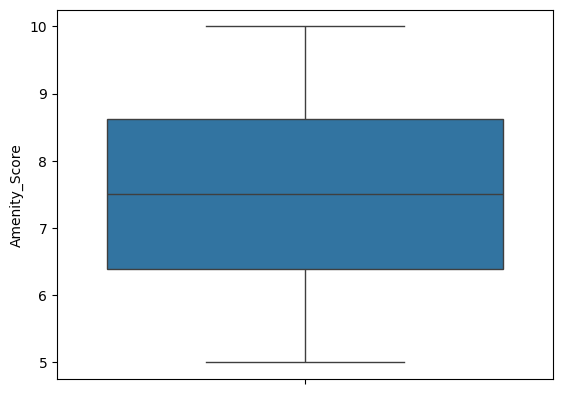

In [835]:
sns.boxplot(y=df_copy['Amenity_Score'])

<Figure size 2200x1000 with 0 Axes>

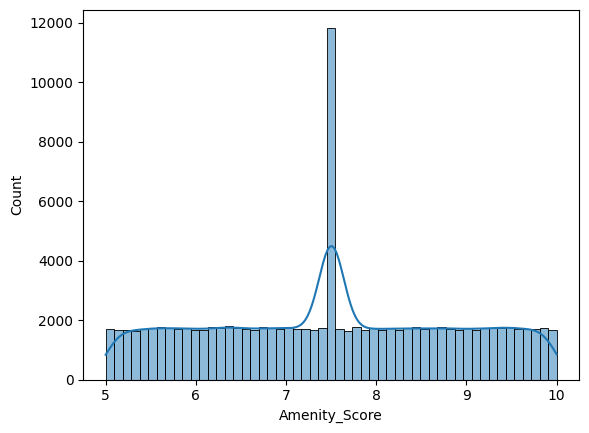

<Figure size 2200x1000 with 0 Axes>

In [836]:
sns.histplot(df_copy['Amenity_Score'], kde=True)
plt.figure(figsize=(22, 10))

In [837]:
df_copy['Amenity_Score']=df_copy['Amenity_Score'].round(2).astype(float).map('{:.2f}'.format)

In [838]:
df_copy['Amenity_Score'].unique()

array(['5.46', '7.50', '8.67', '5.72', '8.61', '8.36', '9.57', '5.58',
       '7.76', '6.94', '6.73', '9.91', '9.70', '8.77', '5.19', '6.90',
       '9.66', '8.12', '8.65', '9.28', '6.62', '9.46', '7.65', '8.45',
       '7.14', '7.47', '7.66', '8.15', '5.86', '5.49', '7.45', '8.58',
       '7.20', '9.77', '5.32', '5.09', '5.96', '6.34', '7.57', '5.77',
       '9.52', '5.29', '5.95', '9.55', '6.76', '7.00', '9.24', '9.82',
       '5.14', '9.72', '8.40', '6.88', '7.93', '5.22', '5.48', '7.04',
       '7.34', '9.26', '6.21', '8.28', '5.38', '7.51', '8.60', '6.08',
       '7.82', '7.18', '9.92', '7.62', '6.13', '9.96', '8.44', '9.94',
       '7.37', '7.42', '6.03', '5.74', '8.88', '7.90', '6.22', '6.37',
       '5.28', '7.09', '9.30', '6.45', '8.70', '9.17', '9.44', '6.46',
       '9.50', '5.92', '6.63', '6.27', '9.83', '9.42', '9.63', '9.03',
       '5.56', '7.48', '9.00', '6.26', '9.67', '6.67', '6.84', '6.00',
       '7.89', '8.09', '9.01', '8.73', '8.62', '6.12', '7.31', '7.94',
      

In [839]:
df_copy['Possession_Status'].unique()

array(['Launch', 'Under construction', 'Ready to move'], dtype=object)

In [840]:
df_copy['Possession_Status'].isnull().sum()

np.int64(0)

In [841]:
df_copy['NRI_Buyer'].unique()

array(['yes', 'no'], dtype=object)

In [842]:
df_copy['NRI_Buyer'].isnull().sum()

np.int64(0)

In [843]:
df_copy['Locality_Infra_Score'].unique()

array([9.21249094, 7.72389833, 6.98549299, ..., 8.98499019, 7.63471681,
       6.03994292], shape=(100000,))

In [844]:
df_copy['Locality_Infra_Score'].isnull().sum()

np.int64(0)

In [845]:
# Rounding off the 'Locality_Infra_Score' to 1 decimal with formating  places for better readability and consistency

df_copy['Locality_Infra_Score'] = df_copy['Locality_Infra_Score'].round(2).astype(float).map('{:.1f}'.format)

In [846]:
df_copy['Locality_Infra_Score'].unique()

array(['9.2', '7.7', '7.0', '6.1', '5.3', '5.2', '9.8', '9.1', '8.6',
       '8.4', '9.3', '7.5', '9.7', '6.2', '8.9', '8.7', '5.0', '8.3',
       '8.1', '5.9', '9.0', '6.8', '9.5', '6.3', '7.4', '6.7', '7.2',
       '10.0', '5.4', '9.9', '5.7', '5.6', '8.5', '7.8', '7.9', '9.6',
       '5.1', '6.4', '8.8', '9.4', '5.5', '5.8', '8.2', '6.5', '7.3',
       '8.0', '6.6', '7.6', '6.9', '7.1', '6.0'], dtype=object)

In [847]:
df_copy['Avg_Traffic_Time_Min'].unique()

array([ 18, 106, 113,  16,  74,  31,  68, 102,  52,  46,  55,  33,  70,
        77, 118, 116,  58,  32,  51,  56,  43,  65, 105,  27,  34,  95,
        60,  64,  38,  42,  37,  93,  72, 111,  19,  63,  57,  73,  53,
        20,  35, 100, 107,  17,  80,  30,  69,  84,  25, 112,  67,  39,
        50, 114,  47, 101,  23,  66,  78,  71,  44,  85, 104,  40,  99,
        91,  79,  29,  97,  76,  41,  98,  62,  75,  24,  54, 108,  94,
        26,  48,  36,  88, 119,  96, 103,  83, 109,  15,  61,  81,  45,
       117,  92,  87,  82,  21,  59,  22,  86,  49,  90,  28, 115,  89,
       110])

In [848]:
df_copy['Avg_Traffic_Time_Min'].isnull().sum()

np.int64(0)

In [849]:
df_copy['Avg_Traffic_Time_Min'].astype('float')

0          18.0
1         106.0
2         113.0
3         106.0
4          18.0
          ...  
100995     22.0
100996     26.0
100997     44.0
100998     66.0
100999     58.0
Name: Avg_Traffic_Time_Min, Length: 101000, dtype: float64

In [850]:
df_copy['Buyer_Comments'].unique()

array(['Loved the amenities!', nan, 'Agent was not responsive.',
       'Excellent location!', 'Too far from my office.',
       'Underpriced for location.', 'Will buy after possession.',
       'Great value for money.', 'Connectivity is poor.',
       'Great view from 15th floor.'], dtype=object)

In [851]:
# We can see that there are a significant number of missing values in the 'Buyer_Comments' column.
# Since this is a text-based column and may not be critical for numerical analysis
# this column can be dropped for future analysis.
df_copy['Buyer_Comments'].isnull().sum()

np.int64(18287)

In [852]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Property_ID           101000 non-null  object        
 1   Micro_Market          101000 non-null  object        
 2   Project_Name          101000 non-null  object        
 3   Developer_Name        101000 non-null  object        
 4   Unit_Size_Sqft        101000 non-null  float64       
 5   Configuration         101000 non-null  object        
 6   Ticket_Price_Cr       101000 non-null  float64       
 7   Transaction_Type      101000 non-null  object        
 8   Buyer_Type            101000 non-null  object        
 9   Purchase_Quarter      101000 non-null  datetime64[ns]
 10  Connectivity_Score    101000 non-null  float64       
 11  Amenity_Score         101000 non-null  object        
 12  Possession_Status     101000 non-null  object        
 13 

In [853]:
df_copy.describe()

,Unit_Size_Sqft,Ticket_Price_Cr,Purchase_Quarter,Connectivity_Score,Avg_Traffic_Time_Min,Year,Month,Day
count,101000.000000,101000.000000,101000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000
mean,6005.625093,12.079957,2024-05-15 06:47:26.922772224,6.992619,67.182921,2023.749485,7.494950,30.499366
min,3000.000000,4.916500,2023-06-30 00:00:00,4.000031,15.000000,2023.000000,3.000000,30.000000
25%,4683.000000,10.341385,2023-09-30 00:00:00,5.494526,41.000000,2023.000000,3.000000,30.000000
50%,6005.625093,12.313523,2024-03-31 00:00:00,6.985805,67.000000,2024.000000,6.000000,30.000000
75%,7332.000000,13.658905,2024-09-30 00:00:00,8.490000,93.000000,2024.000000,9.000000,31.000000
max,8999.000000,19.178186,2025-03-31 00:00:00,9.999970,119.000000,2025.000000,12.000000,31.000000
std,1638.522660,2.641628,NaN,1.731757,30.271611,0.660227,3.352414,0.500002


In [854]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Property_ID           101000 non-null  object        
 1   Micro_Market          101000 non-null  object        
 2   Project_Name          101000 non-null  object        
 3   Developer_Name        101000 non-null  object        
 4   Unit_Size_Sqft        101000 non-null  float64       
 5   Configuration         101000 non-null  object        
 6   Ticket_Price_Cr       101000 non-null  float64       
 7   Transaction_Type      101000 non-null  object        
 8   Buyer_Type            101000 non-null  object        
 9   Purchase_Quarter      101000 non-null  datetime64[ns]
 10  Connectivity_Score    101000 non-null  float64       
 11  Amenity_Score         101000 non-null  object        
 12  Possession_Status     101000 non-null  object        
 13 

In [855]:
df_copy['Connectivity_Score'].unique()

array([7.99009059, 4.83902377, 8.13131488, ..., 6.19334714, 9.43564628,
       5.78629175], shape=(100000,))

In [856]:
df_copy['Connectivity_Score'].isnull().sum()    

np.int64(0)

In [857]:
# Rounding off the 'Connectivity_Score' to 1 decimal places for better readability and consistency

df_copy['Connectivity_Score'] = df_copy['Connectivity_Score'].round(1).astype(float).map('{:.1f}'.format)

In [858]:
df_copy['Connectivity_Score'].unique()

array(['8.0', '4.8', '8.1', '7.5', '4.5', '7.9', '8.6', '6.8', '7.3',
       '10.0', '8.5', '9.0', '9.1', '9.8', '7.8', '9.4', '6.3', '8.8',
       '6.1', '8.2', '5.9', '5.1', '5.5', '9.3', '6.2', '7.4', '8.4',
       '4.3', '5.0', '4.9', '8.9', '6.7', '7.0', '5.6', '7.7', '9.6',
       '4.0', '5.8', '4.6', '4.1', '8.3', '6.5', '6.4', '5.2', '9.9',
       '4.2', '9.2', '5.3', '6.9', '7.6', '5.4', '9.7', '6.6', '8.7',
       '5.7', '7.1', '4.7', '7.2', '6.0', '9.5', '4.4'], dtype=object)

In [859]:
df_copy['Locality_Infra_Score'].astype('float')

0         9.2
1         7.7
2         7.0
3         6.1
4         5.3
         ... 
100995    7.5
100996    9.8
100997    9.1
100998    8.6
100999    9.9
Name: Locality_Infra_Score, Length: 101000, dtype: float64

In [860]:
df_copy['Locality_Infra_Score'].unique()

array(['9.2', '7.7', '7.0', '6.1', '5.3', '5.2', '9.8', '9.1', '8.6',
       '8.4', '9.3', '7.5', '9.7', '6.2', '8.9', '8.7', '5.0', '8.3',
       '8.1', '5.9', '9.0', '6.8', '9.5', '6.3', '7.4', '6.7', '7.2',
       '10.0', '5.4', '9.9', '5.7', '5.6', '8.5', '7.8', '7.9', '9.6',
       '5.1', '6.4', '8.8', '9.4', '5.5', '5.8', '8.2', '6.5', '7.3',
       '8.0', '6.6', '7.6', '6.9', '7.1', '6.0'], dtype=object)

In [861]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Property_ID           101000 non-null  object        
 1   Micro_Market          101000 non-null  object        
 2   Project_Name          101000 non-null  object        
 3   Developer_Name        101000 non-null  object        
 4   Unit_Size_Sqft        101000 non-null  float64       
 5   Configuration         101000 non-null  object        
 6   Ticket_Price_Cr       101000 non-null  float64       
 7   Transaction_Type      101000 non-null  object        
 8   Buyer_Type            101000 non-null  object        
 9   Purchase_Quarter      101000 non-null  datetime64[ns]
 10  Connectivity_Score    101000 non-null  object        
 11  Amenity_Score         101000 non-null  object        
 12  Possession_Status     101000 non-null  object        
 13 

In [862]:
df_copy['Unit_Size_Sqft']=df_copy['Unit_Size_Sqft'].astype('int')

In [868]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Property_ID           101000 non-null  object        
 1   Micro_Market          101000 non-null  object        
 2   Project_Name          101000 non-null  object        
 3   Developer_Name        101000 non-null  object        
 4   Unit_Size_Sqft        101000 non-null  int64         
 5   Configuration         101000 non-null  object        
 6   Ticket_Price_Cr       101000 non-null  float64       
 7   Transaction_Type      101000 non-null  object        
 8   Buyer_Type            101000 non-null  object        
 9   Purchase_Quarter      101000 non-null  datetime64[ns]
 10  Connectivity_Score    101000 non-null  object        
 11  Amenity_Score         101000 non-null  object        
 12  Possession_Status     101000 non-null  object        
 13 

In [873]:
df_copy['Connectivity_Score']=df_copy['Connectivity_Score'].astype('float')

In [871]:
df_copy['Amenity_Score']=df_copy['Amenity_Score'].astype('float')

In [883]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Property_ID           101000 non-null  object        
 1   Micro_Market          101000 non-null  object        
 2   Project_Name          101000 non-null  object        
 3   Developer_Name        101000 non-null  object        
 4   Unit_Size_Sqft        101000 non-null  int64         
 5   Configuration         101000 non-null  object        
 6   Ticket_Price_Cr       101000 non-null  object        
 7   Transaction_Type      101000 non-null  object        
 8   Buyer_Type            101000 non-null  object        
 9   Purchase_Quarter      101000 non-null  datetime64[ns]
 10  Connectivity_Score    101000 non-null  float64       
 11  Amenity_Score         101000 non-null  float64       
 12  Possession_Status     101000 non-null  object        
 13 

In [876]:
df_copy['Ticket_Price_Cr']=df_copy['Ticket_Price_Cr'].round(2).map('{:.2f}'.format)

In [877]:
df_copy

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,...,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments,Year,Month,Day,connectivity_Score
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025,4BHK,12.75,Primary,NRI,2025-03-31,...,Launch,Broker,yes,9.2,18,Loved the amenities!,2025,3,31,8.0
1,PROP000002,IndiraNagar,Project_1,Puravankara,5760,3BHK,16.29,Primary,Other,2024-06-30,...,Under construction,NRI Desk,no,7.7,106,NaN,2024,6,30,4.8
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707,4BHK,10.52,Primary,HNI,2023-12-31,...,Ready to move,Direct,yes,7.0,113,Agent was not responsive.,2023,12,31,8.1
3,PROP000004,Bellary Road,Project_3,Embassy,6192,3BHK,9.40,Primary,HNI,2024-03-31,...,Ready to move,Online,yes,6.1,106,Excellent location!,2024,3,31,7.5
4,PROP000005,Koramangala,Project_4,SNN Raj,7147,4BHK,15.35,Secondary,HNI,2024-12-31,...,Under construction,Broker,no,5.3,18,Too far from my office.,2024,12,31,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100995,PROP004730,Bellary Road,Project_229,Embassy,8546,5BHK+,11.33,Secondary,CXO,2024-12-31,...,Under construction,NRI Desk,no,7.5,22,Will buy after possession.,2024,12,31,8.6
100996,PROP059810,Bellary Road,Project_309,Brigade,3408,3BHK,10.83,Primary,CXO,2024-09-30,...,Ready to move,Direct,no,9.8,26,Agent was not responsive.,2024,9,30,6.9
100997,PROP065099,Hennur Road,Project_98,RMZ,4691,4BHK,11.18,Primary,NRI,2023-12-31,...,Under construction,Broker,no,9.1,44,Loved the amenities!,2023,12,31,6.8
100998,PROP093022,RajajiNagar,Project_21,Embassy,7435,3BHK,10.91,Secondary,Other,2024-06-30,...,Under construction,Broker,yes,8.6,66,Excellent location!,2024,6,30,4.4


In [885]:
df_copy['Month'].unique()

array([ 3,  6, 12,  9], dtype=int32)

In [887]:
map_Quater = { '3': 'Q1',
               '12': 'Q4',
               '6': 'Q2',
               '9': 'Q3'
}
df_copy['Quarter_Label'] = df_copy['Month'].astype(str).map(map_Quater)   

In [888]:
from sqlalchemy import create_engine

# Replace with your actual credentials
user = "root"
password = "root"
host = "localhost"
port = "3306"
database = "project_Lux_Housing_Blr"

# Create SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://root:root@{host}:3306/project_Lux_Housing_Blr")
# Write the cleaned DataFrame to the SQL table
df_copy.to_sql(name='Lux_Housing_Blr_Clean_Data', con=engine, if_exists='replace', index=False)
df_copy  

C:\Users\mohan\AppData\Local\Temp\ipykernel_22580\391167860.py:13: UserWarning: The provided table name 'Lux_Housing_Blr_Clean_Data' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  df_copy.to_sql(name='Lux_Housing_Blr_Clean_Data', con=engine, if_exists='replace', index=False)


,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,...,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments,Year,Month,Day,Quarter_Label
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025,4BHK,12.75,Primary,NRI,2025-03-31,...,Launch,Broker,yes,9.2,18,Loved the amenities!,2025,3,31,Q1
1,PROP000002,IndiraNagar,Project_1,Puravankara,5760,3BHK,16.29,Primary,Other,2024-06-30,...,Under construction,NRI Desk,no,7.7,106,NaN,2024,6,30,Q2
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707,4BHK,10.52,Primary,HNI,2023-12-31,...,Ready to move,Direct,yes,7.0,113,Agent was not responsive.,2023,12,31,Q4
3,PROP000004,Bellary Road,Project_3,Embassy,6192,3BHK,9.40,Primary,HNI,2024-03-31,...,Ready to move,Online,yes,6.1,106,Excellent location!,2024,3,31,Q1
4,PROP000005,Koramangala,Project_4,SNN Raj,7147,4BHK,15.35,Secondary,HNI,2024-12-31,...,Under construction,Broker,no,5.3,18,Too far from my office.,2024,12,31,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100995,PROP004730,Bellary Road,Project_229,Embassy,8546,5BHK+,11.33,Secondary,CXO,2024-12-31,...,Under construction,NRI Desk,no,7.5,22,Will buy after possession.,2024,12,31,Q4
100996,PROP059810,Bellary Road,Project_309,Brigade,3408,3BHK,10.83,Primary,CXO,2024-09-30,...,Ready to move,Direct,no,9.8,26,Agent was not responsive.,2024,9,30,Q3
100997,PROP065099,Hennur Road,Project_98,RMZ,4691,4BHK,11.18,Primary,NRI,2023-12-31,...,Under construction,Broker,no,9.1,44,Loved the amenities!,2023,12,31,Q4
100998,PROP093022,RajajiNagar,Project_21,Embassy,7435,3BHK,10.91,Secondary,Other,2024-06-30,...,Under construction,Broker,yes,8.6,66,Excellent location!,2024,6,30,Q2
